In [1]:
import os
import pandas as pd
import numpy as np
from skimage import color
from skimage import io
import matplotlib.pyplot as plt
import json
from collections import namedtuple
import periodictable

#from string import maketrans
from pprint import pprint

In [2]:
data_dir = "./datas/meteorite_mineral_mapper/dataset_1_opaques/"

In [3]:
standard_dirs = list(filter(lambda d: d[:14] == "standards_32bt", [d for d in os.listdir('./datas/meteorite_mineral_mapper/dataset_1_opaques/')]))
mask_dirs = list(filter(lambda d: d[:4] != "obj1" and d[:4] != "obj2" and d[-8:]=="mask.tif",[d for d in os.listdir('./datas/meteorite_mineral_mapper/dataset_1_opaques/')]))
obj1_dirs = list(filter(lambda d: d[:9] == "obj1_32bt", [d for d in os.listdir('./datas/meteorite_mineral_mapper/dataset_1_opaques/')]))
obj2_dirs = list(filter(lambda d: d[:9] == "obj2_32bt", [d for d in os.listdir('./datas/meteorite_mineral_mapper/dataset_1_opaques/')]))

In [4]:
standards = {}
for s in standard_dirs:
    tmp = s.split(".")[0].split("_")[-1]
    standards[tmp] = io.imread(data_dir+s)
masks = {}
for m in mask_dirs:
    if ('rutile' in m):
        masks["TiO2"] = io.imread(data_dir+m)
    else:
        masks[m.split("std")[0].split("_")[0].split("-")[0]] = io.imread(data_dir+m)
obj1 = {}
for o in obj1_dirs:
    tmp = o.split(".")[0].split("_")[-1]
    obj1[tmp] = io.imread(data_dir+o)

obj2 = {}
for o in obj2_dirs:
    tmp = o.split(".")[0].split("_")[-1]
    obj2[tmp] = io.imread(data_dir+o)

In [5]:
def show(array, index):
    plt.imshow(array[index], cmap="gray")

In [6]:
masks.keys()

dict_keys(['NiS', 'Ni', 'SCOlv', 'FeS', 'Fe', 'CaTiO3', 'Fe3O4', 'TiO2'])

In [7]:
f = open('./parsed_weight')
parsed_weight = json.load(f)
weights = {}
for mask in masks.keys():
    weights[mask] = {}
    if mask == "SCOlv":
        for s in parsed_weight["10"].keys():
            if s in standards.keys():
                weights[mask][s] = parsed_weight["10"][s]/100
            else:
                weights[mask][standard] = 0
    else:
        for standard in standards.keys():
            d = dict((str(e), w) for e,w in periodictable.formula(mask).mass_fraction.items())
            if standard in mask:
                weights[mask][standard] = d[standard]
            else:
                weights[mask][standard] = 0
weights

{'NiS': {'Cr': 0,
  'Ni': 0.6466993688738453,
  'Si': 0,
  'Ca': 0,
  'S': 0.35330063112615473,
  'Al': 0,
  'P': 0,
  'Fe': 0,
  'Mg': 0,
  'Ti': 0},
 'Ni': {'Cr': 0,
  'Ni': 1.0,
  'Si': 0,
  'Ca': 0,
  'S': 0,
  'Al': 0,
  'P': 0,
  'Fe': 0,
  'Mg': 0,
  'Ti': 0},
 'SCOlv': {'Ti': 0,
  'Si': 0.19079999999999997,
  'Al': 0.0,
  'Fe': 0.0742,
  'Mg': 0.298,
  'Ca': 0.0002,
  'P': 0.0,
  'Cr': 0.0,
  'Ni': 0.0029,
  'S': 0.0},
 'FeS': {'Cr': 0,
  'Ni': 0,
  'Si': 0,
  'Ca': 0,
  'S': 0.3647480377658969,
  'Al': 0,
  'P': 0,
  'Fe': 0.6352519622341031,
  'Mg': 0,
  'Ti': 0},
 'Fe': {'Cr': 0,
  'Ni': 0,
  'Si': 0,
  'Ca': 0,
  'S': 0,
  'Al': 0,
  'P': 0,
  'Fe': 1.0,
  'Mg': 0,
  'Ti': 0},
 'CaTiO3': {'Cr': 0,
  'Ni': 0,
  'Si': 0,
  'Ca': 0.29481430479788623,
  'S': 0,
  'Al': 0,
  'P': 0,
  'Fe': 0,
  'Mg': 0,
  'Ti': 0.3521102931224217},
 'Fe3O4': {'Cr': 0,
  'Ni': 0,
  'Si': 0,
  'Ca': 0,
  'S': 0,
  'Al': 0,
  'P': 0,
  'Fe': 0.723591407862219,
  'Mg': 0,
  'Ti': 0},
 'TiO2': {'Cr'

In [8]:
def mask(mask, standard):
    t = np.zeros_like(standard)
    for i in range(256):
        for j in range(512):
            if (mask[i][j]):
                t[i][j] = standard[i][j]
    return t

mask_maps = {}
for k in masks.keys():
    mask_maps[k] = {}
    for s in standards.keys():
        mask_maps[k][s] = mask(masks[k], standards[s])

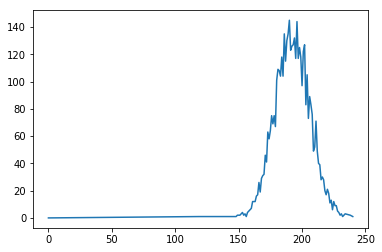

In [9]:
y = np.bincount(mask_maps['NiS']['Ni'].flatten())
ii = np.nonzero(y)[0]
xx = []
yy = []
for i, j in zip(ii, y[ii]):
    xx.append(i)
    yy.append(j)
xx = [0] + xx[1:]
yy = [0] + yy[1:]
xx = np.array(xx)
yy = np.array(yy)
plt.plot(xx, yy)

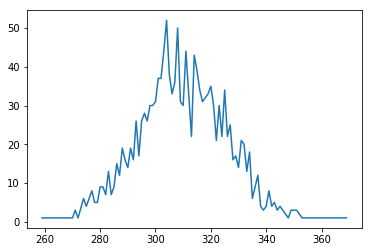

In [10]:
y = np.bincount(mask_maps['Ni']['Ni'].flatten())
ii = np.nonzero(y)[0]
xx = []
yy = []
for i, j in zip(ii, y[ii]):
    xx.append(i)
    yy.append(j)
xx = xx[1:]
yy = yy[1:]
xx = np.array(xx)
yy = np.array(yy)
plt.plot(xx, yy)

In [11]:
def average_std(mask, standard):
    t = 0
    d = mask_maps[mask][standard].flatten()
    ret_avg = d[d != 0].mean()
    red_std = d[d != 0].std()
    return ret_avg, red_std

In [12]:
#Minyoung's garbage - can be deleted any time'
# Compound_choice = input("What is the compound? ")
# type(Compound_choice)
# Element_choice = input("What is the element? ")
# type(Element_choice)
# with open('./parsed_weight') as f:
#     data = json.load(f)
    
# for kek in range(23): 
#     if data[str(kek)]['Minerals']==Compound_choice:
#         weight_percentage =  data[str(kek)][Element_choice]
#         print (Element_choice + " weight perecentage:" + str(data[str(kek)][Element_choice]) + "%")
    
# avg_ni,_=average_std('NiS', Element_choice )

# fig = plt.figure()
# ax = plt.axes()

# x = np.linspace(0, 255, 255)
# ax.plot(x, x*( weight_percentage/avg_ni)) ;

In [13]:
mask_maps

{'NiS': {'Cr': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint32),
  'Ni': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint32),
  'Si': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint32),
  'Ca': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint32),
  'S': array([[0, 0, 0, ..., 0, 0

In [14]:
weights["NiS"].keys()

dict_keys(['Cr', 'Ni', 'Si', 'Ca', 'S', 'Al', 'P', 'Fe', 'Mg', 'Ti'])

In [57]:
lin_models = {}
i = 0.00000001
stds = {}
samples = {}
for s in standards.keys():
    x = []
    y = []
    for m in masks.keys():
        dd = mask_maps[m][s].flatten()
        dd = dd[dd != 0]
        for d in dd: 
            if s in weights[m].keys():
                if (weights[m][s] != 0):
                    x.append(weights[m][s])
                else:
                    x.append(i)
                    i = i + 0.01
                    if (i > 0.03):
                        i = 0.01
            y.append(d)
    if (len(x)):
        p, V = np.polyfit(y, x, 1, cov=True)
        stds[s] = np.sqrt(V[1][1])
        lin_models[s] = np.poly1d(p)
        samples[s] = len(x)

In [61]:
stds

{'Cr': 0.0001152324038081346,
 'Ni': 0.00035077229962069713,
 'Si': 8.450672481015387e-05,
 'Ca': 0.00031390291020459504,
 'S': 0.0018322170774605255,
 'Al': 0.0002482332055323443,
 'P': 0.00017729477585606452,
 'Fe': 0.00045906747445304517,
 'Mg': 0.00023661274110876036,
 'Ti': 8.905015464045917e-05}

from model: 0.9828809882011769
average: (192.22652885443583, 13.914124554256196)


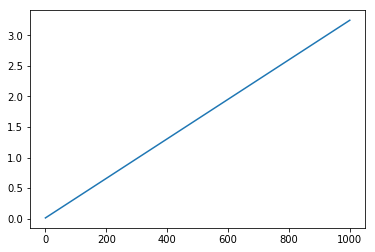

In [52]:
x = np.linspace(0, 1000, 10000)
plt.plot(x, lin_models["Ni"](x))
print("from model: {}".format(lin_models["Ni"](300)))
print("average: {}".format(average_std("NiS","Ni")))

In [17]:
standards.keys()

dict_keys(['Cr', 'Ni', 'Si', 'Ca', 'S', 'Al', 'P', 'Fe', 'Mg', 'Ti'])

In [18]:
masks.keys()

dict_keys(['NiS', 'Ni', 'SCOlv', 'FeS', 'Fe', 'CaTiO3', 'Fe3O4', 'TiO2'])

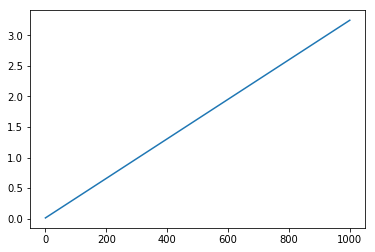

In [19]:
plt.plot(x, lin_models["Ni"](x))

In [109]:
from PIL import Image
import numpy as np
import scipy.stats as ss
from numpy import linalg as la
from periodictable import elements
import time
import math

def add_minerals(known_comps):
    mineral_file = open("standard-element-concentrations.csv")
    element_names = mineral_file.readline()
    element_names = element_names.split(',')

    for mineral in mineral_file:
        element_dict = {}
        element_values = mineral.split(',')
        if element_values[-1].endswith('\n'):
            element_values[-1]=element_values[-1][:-1]
        for i in range(len(element_values)):
            if i == 0:
                pass
            else:
                if element_values[i]!='':
                    element_dict[element_names[i]] = float(element_values[i])/100
                else:
                    element_dict[element_names[i]]=0
        known_comps[element_values[0]] = element_dict
    return known_comps

# input file should follows this format Mg,Si,O_2 for MgSiO2 and a new line for each compound
def read_known_comps():
    known_comps = {}
    file = open("known_compounds.txt")
    for line in file:
        element_dict = {}
        cpd_name = ''
        elements = line.split(',')
        for element in elements:
            dict_entries = element.split('_')

            if (len(dict_entries) == 1):
                if dict_entries[0].endswith('\n'):
                    dict_entries[0] = dict_entries[0][:-1]
                element_dict[dict_entries[0]] = 1
            else:
                if dict_entries[1].endswith('\n'):
                    dict_entries[1] = dict_entries[1][:-1]
                cpd_name += dict_entries[1]
                element_dict[dict_entries[0]] = int(dict_entries[1])
            cpd_name += dict_entries[0]
        known_comps[cpd_name] = element_dict

    return known_comps

def read_pt():
    element_table = {}
    for el in elements:
        element_table[el.symbol] = el.mass
    return element_table

# known compositions : dict of name of compound with a dictionary of elements with num of elements as the values
def weight_calculation(known_compositions, list_of_elements):
    element_table = read_pt()
    calculated_weights = {}
    for compound_key, compound_dict in known_compositions.items():
        cpd_weight = 0
        present_elements = {}
        for element_key, element_num in compound_dict.items():
            cpd_weight += element_num * float(element_table[element_key])
        for element_key, element_num in compound_dict.items():
            if element_key in list_of_elements:
                present_elements[element_key] = element_num * float(element_table[element_key]) / cpd_weight
        calculated_weights[compound_key] = present_elements
    return calculated_weights


def vectorization_of_known_comps(list_of_elements):
    known_comps = read_known_comps()
    known_comps = weight_calculation(known_comps, list_of_elements)
    #known_comps = add_minerals(known_comps)
    vec_known_comps = {}
    for compound, composition in known_comps.items():
        vec_compound = np.zeros(len(list_of_elements))
        for ele_index, ele_name in enumerate(list_of_elements):
            if ele_name in composition:
                vec_compound[ele_index] = composition[ele_name]
            else:
                vec_compound[ele_index] = 0
        vec_known_comps[compound] = vec_compound
    return vec_known_comps


# indices are shifted by 1
# def identification(percent_comps, list_of_elements):
#     # lets vectorize the known_comps to the appropriate
#     known_comps = vectorization_of_known_comps(list_of_elements)
#     results_dict = {}

#     # This part is purely for visualization
#     matrix_size = percent_comps.shape
#     discrete_comp = np.chararray((matrix_size[0], matrix_size[1]))
#     discrete_comp[:] = ''
#     #print(known_comps)
#     #threshold = threshold_calculation(stds,samples)
#     threshold = 1
    
#     for i in range(matrix_size[0]):
#         for j in range(matrix_size[1]):
#             most_prob = ['Unknown', 10]  # First index is element, Second is percent probability
#             for comp_name, composition_vector in known_comps.items():
#                 norm_of_diff = la.norm(percent_comps[i][j] - composition_vector)
#                 # if ss.norm(0, stddev_of_kc[most_prob[0]]).pdf(norm_of_diff) < most_prob[1]: # what it should be.
#                 # also could just make it quadratic would fit better but its like the same thing
#                 if norm_of_diff < most_prob[1] and norm_of_diff < threshold:
#                     most_prob = [comp_name, norm_of_diff]  # change to prob later
#             if most_prob[0] in results_dict:
#                 results_dict[most_prob[0]] += 1
#             else:
#                 results_dict[most_prob[0]] = 1
#             # need to add something that takes the most prob ones
#             discrete_comp[i][j] = most_prob[0]
    

#     for comp_name, comp_count in results_dict.items():
#         results_dict[comp_name] = comp_count / (matrix_size[0]*matrix_size[1])
    
#     return results_dict, discrete_comp

def identification(percent_comps, list_of_elements):
    threshold = 1
    # lets vectorize the known_comps to the appropriate
    known_comps = vectorization_of_known_comps(list_of_elements)

    stddev_of_kc = []  # standard deviation of known compositions

    results_dict = {}

    # This part is purely for visualization
    matrix_size = percent_comps.shape
    discrete_comp = np.chararray((matrix_size[0], matrix_size[1]))
    discrete_comp[:] = ''

    for i in range(matrix_size[0]):
        for j in range(matrix_size[1]):
            most_prob = ['Unknown', 10]  # First index is element, Second is percent probability
            for comp_name, composition_vector in known_comps.items():
                norm_of_diff = la.norm(percent_comps[i][j] - composition_vector)
                # if ss.norm(0, stddev_of_kc[most_prob[0]]).pdf(norm_of_diff) < most_prob[1]: # what it should be.
                # also could just make it quadratic would fit better but its like the same thing
                if norm_of_diff < most_prob[1] and norm_of_diff < threshold:
                    most_prob = [comp_name, norm_of_diff]  # change to prob later

            if most_prob[0] in results_dict:
                results_dict[most_prob[0]] += 1
            else:
                results_dict[most_prob[0]] = 1
            # need to add something that takes the most prob ones
            discrete_comp[i][j] = most_prob[0]

    for comp_name, comp_count in results_dict.items():
        results_dict[comp_name] = comp_count / (matrix_size[0]*matrix_size[1])
    

    
    return results_dict, discrete_comp

def threshold_calculation(std_dev, samples_taken):
    z = 1.96
    summ = 0.0
    for element_name, dev in std_dev.items():
        temp = (math.sqrt(float(dev)*z/float(samples_taken[element_name])))
        summ += temp*temp
    return math.sqrt(summ)

In [54]:
list_of_elements = []
gs_matrix = []
f = open("pic_names.txt")
for line in f:
    try:
        im = Image.open(line[:-1])
        words = line.split('_')
        list_of_elements.append(words[2][:-5])  # This is kind of sloppy
        gs_matrix.append(np.array(im).astype(np.float64))
    except IOError:
        print("oof")
        pass

In [96]:
idx = 0
for element, e in zip(gs_matrix, list_of_elements):
    for i in range(element.shape[0]):
        for j in range(element.shape[1]):
            gs_matrix[idx][i][j] = lin_models[e](gs_matrix[idx][i][j])
    idx += 1
big_boy = np.dstack(gs_matrix[:])

In [110]:
results, discrete_comp = identification(big_boy, list_of_elements)
summ = 0
for name, percent in results.items():
    print(name + ": " + str(percent))

MgSi3O: 1.0


In [24]:
summ = 0
for name, percent in results.items():
    summ += percent
print(summ)

1.0


In [112]:
big_boy

array([[[0.01991942, 0.01426771, 0.01992715, ..., 0.17566667,
         0.01865103, 0.01630181],
        [0.01991942, 0.01426771, 0.01992715, ..., 0.17566667,
         0.01865096, 0.01630181],
        [0.01991942, 0.01426771, 0.01992715, ..., 0.17566667,
         0.01865095, 0.01630181],
        ...,
        [0.01991942, 0.01426771, 0.01992715, ..., 0.17566667,
         0.01865098, 0.01630181],
        [0.01991942, 0.01426771, 0.01992715, ..., 0.17566667,
         0.01865099, 0.01630181],
        [0.01991942, 0.01426771, 0.01992715, ..., 0.17566667,
         0.018651  , 0.01630181]],

       [[0.01991942, 0.01426771, 0.01992715, ..., 0.17566667,
         0.01865104, 0.01630181],
        [0.01991942, 0.01426771, 0.01992715, ..., 0.17566667,
         0.01865095, 0.01630181],
        [0.01991942, 0.01426771, 0.01992715, ..., 0.17566667,
         0.01865095, 0.01630181],
        ...,
        [0.01991942, 0.01426771, 0.01992715, ..., 0.17566667,
         0.01865101, 0.01630181],
        [0.0

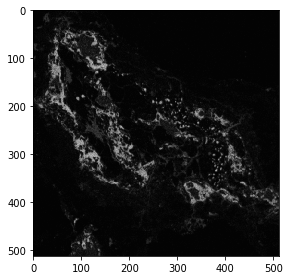

In [43]:
io.imshow(gs_matrix[5])

In [42]:
gs_matrix[4]

array([[0.0928736 , 0.10394523, 0.11944551, ..., 0.20469706, 0.20912571,
        0.18587529],
       [0.07405183, 0.08844495, 0.11944551, ..., 0.19583976, 0.2124472 ,
        0.18366096],
       [0.09730225, 0.09951658, 0.09065927, ..., 0.22573316, 0.19583976,
        0.22019734],
       ...,
       [0.28441279, 0.2423406 , 0.23680479, ..., 0.14601742, 0.16705352,
        0.22573316],
       [0.25894804, 0.19916124, 0.19473259, ..., 0.11944551, 0.16041054,
        0.22573316],
       [0.22794748, 0.18476813, 0.19805408, ..., 0.10726672, 0.15376756,
        0.17258933]])